# Pymaceuticals Inc.
---

### Analysis
- Ramicane and Capomulin exhibit promising efficacy in reducing tumor volumes, with Ramicane having a slightly lower mean. Infubinol and Ceftamin, on the other hand, show higher mean tumor volumes, indicating potential variations or lower effectiveness.

- The effectiveness of Capomulin is highlighted by a consistent decrease in tumor volume throughout the study period.

- The dataset reflects a diverse population with mice of different genders and ages, providing a comprehensive representation.

- The regression analysis underscores a robust relationship between average tumor volume and mouse weight, demonstrating a 70% explanatory power (R-squared value of 0.70).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#mouse_merged_data = pd.merge(study_results, mouse_metadata, on= "Mouse ID")
mouse_merged_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_merged_data['Mouse ID'].unique())



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = mouse_merged_data[mouse_merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
mice_duplicate_id = mice_duplicate["Mouse ID"].unique()
mice_duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the DataFrame for the duplicate Mouse ID(s)
duplicate_mouse_data =mouse_merged_data[mouse_merged_data['Mouse ID'].isin(mice_duplicate_id)]

# Display the data for the duplicate Mouse ID(s)
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_cleaned = mouse_merged_data.drop_duplicates(subset=['Mouse ID'])
#mouse_cleaned.head()
mouse_cleaned = mouse_merged_data.set_index('Mouse ID').drop(index='g989')
mouse_cleaned.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.0,0,Capomulin,Female,9,22
f932,0,45.0,0,Ketapril,Male,15,29
g107,0,45.0,0,Ketapril,Female,2,29
a457,0,45.0,0,Ketapril,Female,11,30
c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_cleaned.index.unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats = mouse_merged_data.groupby('Drug Regimen')

mean = summary_stats["Tumor Volume (mm3)"].mean()
median = summary_stats["Tumor Volume (mm3)"].median()
variance = summary_stats["Tumor Volume (mm3)"].var()
standard_deviation = summary_stats["Tumor Volume (mm3)"].std()
sem = summary_stats["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stats_df= pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance, 'Tumor Volume Std. Dev.': standard_deviation, 'Tumor Volume Std. Err.': sem})
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = mouse_merged_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_df  

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

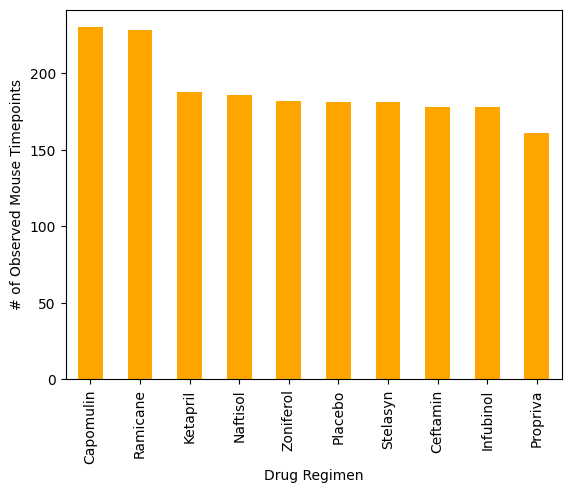

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_count = mouse_merged_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
drug_regimen_count.plot(kind= 'bar', color= 'orange' )


plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()




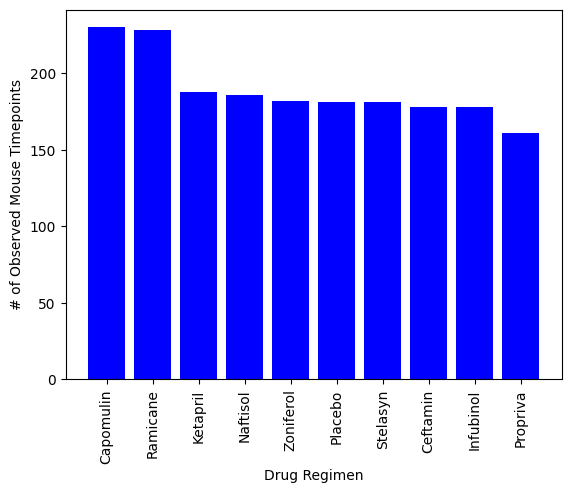

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count = mouse_merged_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# Create a bar plot using pyplot
plt.bar(drug_regimen_count.index, drug_regimen_count, color='blue')

plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

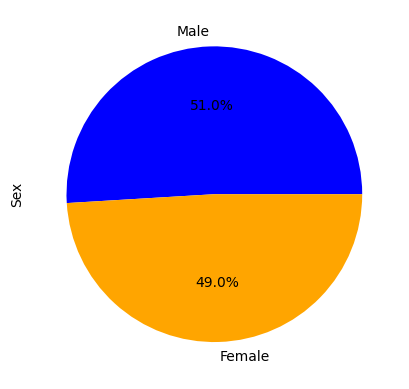

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = mouse_cleaned['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])

plt.ylabel('Sex')
plt.show()

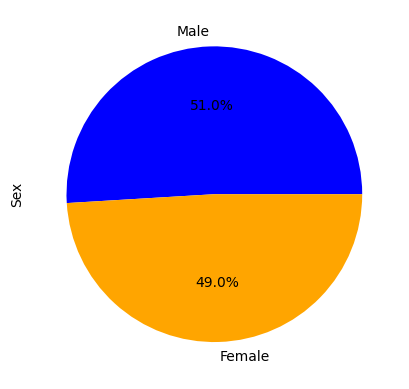

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = mouse_cleaned['Sex'].value_counts()

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

select_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoint_df = mouse_merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, mouse_merged_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the DataFrame for the specified treatment regimens
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(select_regimens)]

# Display the DataFrame with final tumor volumes
display(final_tumor_volume_df.head())
#display(final_tumor_volume_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatments_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

     # add subset 
    treatments_list.append(tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
   # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"  {treatment}'s potential outliers: {outliers}\n")
    


  Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

  Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

  Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

  Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



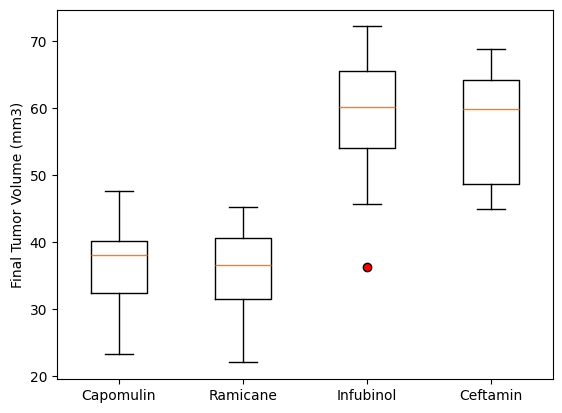

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list to hold tumor volume data for each treatment group
tumor_volume_data = [tumor_volumes for tumor_volumes in treatments_list]

plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o'))

plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

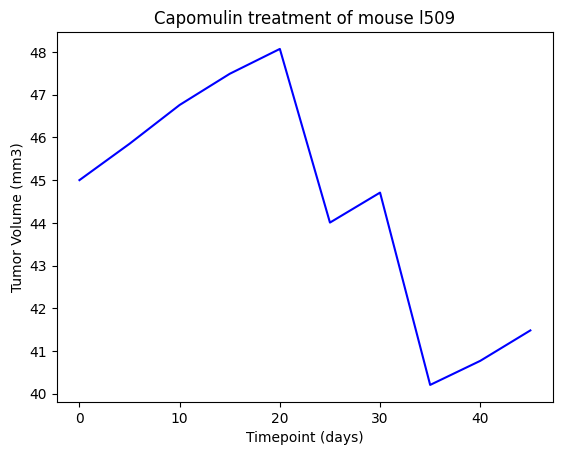

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'l509'
selected_mouse_data = mouse_merged_data[(mouse_merged_data['Drug Regimen'] == 'Capomulin') & (mouse_merged_data['Mouse ID'] == selected_mouse_id)]


plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='blue', label=f'Mouse {selected_mouse_id}')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse_id}')

plt.show()

In [17]:
capomulin_mouse_ids = mouse_merged_data.loc[mouse_merged_data['Drug Regimen'] == 'Capomulin', 'Mouse ID'].unique()
capomulin_mouse_ids

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

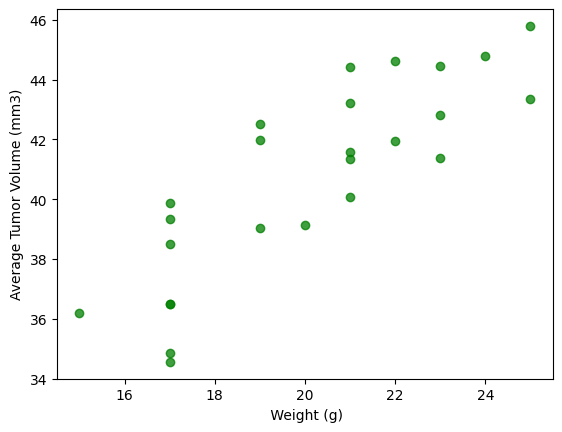

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_merged_data[mouse_merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with mouse metadata to get the weight
capomulin_avg_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='green', alpha=0.75)

plt.xlabel(' Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


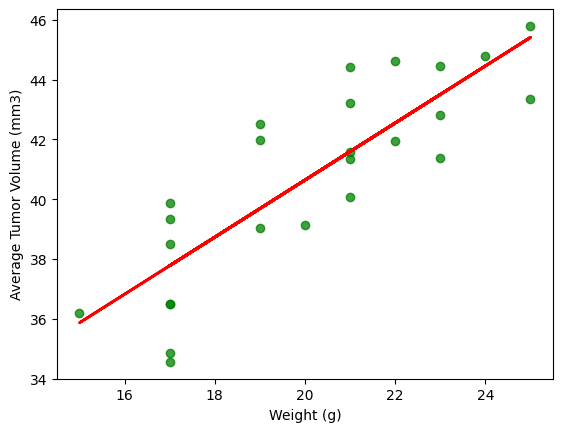

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


capomulin_data = mouse_merged_data[mouse_merged_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_avg_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

correlation_coefficient = capomulin_avg_data['Weight (g)'].corr(capomulin_avg_data['Tumor Volume (mm3)'])
x = capomulin_avg_data['Weight (g)']
y = capomulin_avg_data['Tumor Volume (mm3)']

x_mean, y_mean = x.mean(), y.mean()
m = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean)**2)
b = y_mean - m * x_mean

plt.scatter(x, y, color='green', alpha=0.75)
regression_line = m * x + b
plt.plot(x, regression_line, color='red', linewidth=2)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



print(f"Correlation Coefficient: {correlation_coefficient}")

plt.show()
